# LAB 13- NEURAL NETWORKS

This lab is comprise of 3 examples:

 - 1. Example MNIST 
     - A) Neural Network
     - B) Convolutional Neural Network
 - 2. Poker
 - 3. CTR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UCB Files/2022 Fall/IEOR 142/Lab/Week12')

Mounted at /content/drive


In [3]:
import random
# pip install --upgrade tensorflow
import tensorflow as tf

# Example MNIST

## Preparing the Data

In [4]:
random.seed(88)
np.random.seed(88)
tf.random.set_seed(88)

In [5]:
# MNIST is a popular data set for Neural Network instruction, so you can import it directly from kera.datasets
from tensorflow.keras.datasets import mnist
#or
#from keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


pd.Series(y_train).value_counts()

In [7]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

The most dominant class is '1'. Therefore the baseline accuracy can be computed as:

In [9]:
print('baseline_acc =', 1135/len(y_test))

baseline_acc = 0.1135


Using the code below, we can convert the pixel values into images

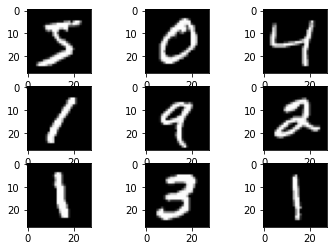

In [10]:
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

Reshape the image data into length 28*28 = 784 feature vectors, then normalize

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_train_reshaped = X_train.reshape(-1, 28*28)
X_train_normalized = X_train_reshaped/255  # 0~255
X_train_normalized.shape

(60000, 28, 28, 1)

In [14]:
X_train_normalized

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [15]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))
# X_test_reshaped = X_test.reshape(-1, 28*28)
X_test_normalized = X_test_reshaped/255
X_test_normalized.shape

(10000, 28, 28, 1)

In [16]:
np.max(X_test_reshaped)

255

### Convert labels to one-hot encoding

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [18]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import RMSprop

tf.random.set_seed(88)
## Defining the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #latten the 2D matrix into 1D image pixels
model.add(Dense(512, activation='relu')) #, input_shape=(28, 28, 1)))
model.add(Dense(10, activation='softmax')) #classification problem, 10 classes

## Compiling the model
opt = RMSprop()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
model.fit(X_train_normalized,y_train_encoded,epochs=5,batch_size=128,validation_split=0.2)






Epoch 1/5
375/375 [==============================] - 6s 13ms/step - loss: 0.2842 - accuracy: 0.9179 - val_loss: 0.1440 - val_accuracy: 0.9590
Epoch 2/5
375/375 [==============================] - 5s 12ms/step - loss: 0.1192 - accuracy: 0.9640 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 3/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0773 - accuracy: 0.9774 - val_loss: 0.0953 - val_accuracy: 0.9728
Epoch 4/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0840 - val_accuracy: 0.9751
Epoch 5/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0412 - accuracy: 0.9881 - val_loss: 0.0789 - val_accuracy: 0.9773


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
print("num of param in 2nd layer:", (784+1)*512)
print("num of param in Output layer:", (512+1)*10)

num of param in 2nd layer: 401920
num of param in Output layer: 5130


In [22]:
#Counting the number of parameters of the linear layer by myself.
784 * 512 + 512

401920

In [23]:
loss, acc = model.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9812
0.9811999797821045


## Convolutional Neural Network

In [24]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
          # num of filters, (size of the filter)
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [26]:
opt = RMSprop()
model2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(X_train_normalized,
           y_train_encoded,
           epochs=5,
           batch_size=64,
           validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 51s 66ms/step - loss: 0.1986 - accuracy: 0.9379 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 2/5
750/750 [==============================] - 53s 71ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0510 - val_accuracy: 0.9846
Epoch 3/5
750/750 [==============================] - 50s 67ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0434 - val_accuracy: 0.9875
Epoch 4/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 5/5
750/750 [==============================] - 53s 70ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0394 - val_accuracy: 0.9901


In [27]:
loss, acc = model2.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0295 - accuracy: 0.9914
0.9914000034332275


# Poker

In [28]:
poker = pd.read_csv('train.csv')

# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 200)
poker.info()
poker.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [29]:
# convert the independent variables to categorical variables
poker[list(poker.columns[0:10])]=poker[list(poker.columns[0:10])].astype('category')

In [30]:
poker.info()
poker.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   S1      25010 non-null  category
 1   C1      25010 non-null  category
 2   S2      25010 non-null  category
 3   C2      25010 non-null  category
 4   S3      25010 non-null  category
 5   C3      25010 non-null  category
 6   S4      25010 non-null  category
 7   C4      25010 non-null  category
 8   S5      25010 non-null  category
 9   C5      25010 non-null  category
 10  hand    25010 non-null  int64   
dtypes: category(10), int64(1)
memory usage: 444.0 KB


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [ ]:
poker_encoded = pd.get_dummies(poker, dtype=int)
poker_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hand    25010 non-null  int64
 1   S1_1    25010 non-null  int64
 2   S1_2    25010 non-null  int64
 3   S1_3    25010 non-null  int64
 4   S1_4    25010 non-null  int64
 5   C1_1    25010 non-null  int64
 6   C1_2    25010 non-null  int64
 7   C1_3    25010 non-null  int64
 8   C1_4    25010 non-null  int64
 9   C1_5    25010 non-null  int64
 10  C1_6    25010 non-null  int64
 11  C1_7    25010 non-null  int64
 12  C1_8    25010 non-null  int64
 13  C1_9    25010 non-null  int64
 14  C1_10   25010 non-null  int64
 15  C1_11   25010 non-null  int64
 16  C1_12   25010 non-null  int64
 17  C1_13   25010 non-null  int64
 18  S2_1    25010 non-null  int64
 19  S2_2    25010 non-null  int64
 20  S2_3    25010 non-null  int64
 21  S2_4    25010 non-null  int64
 22  C2_1    25010 non-null  int64
 23  C2_2    250

In [ ]:
train_encoded = poker_encoded.sample(frac=0.7, random_state=88)
test_encoded = poker_encoded.drop(train_encoded.index)

print(poker_encoded.shape)
print(train_encoded.shape)
print(test_encoded.shape)

(25010, 86)
(17507, 86)
(7503, 86)


In [ ]:
# Baseline
pd.Series(train_encoded['hand']).value_counts()

0    8731
1    7409
2     854
3     376
4      65
5      35
6      25
9       5
7       4
8       3
Name: hand, dtype: int64

In [ ]:
pd.Series(test_encoded['hand']).value_counts()

0    3762
1    3190
2     352
3     137
4      28
5      19
6      11
7       2
8       2
Name: hand, dtype: int64

The most dominant class is '0', the baseline accuracy would predict that

In [ ]:
print('baseline_acc =', 3762/len(test_encoded['hand']))

baseline_acc = 0.5013994402239105


## Linear Discriminant Analysis

In [ ]:
y_train_encoded = train_encoded['hand']
X_train_encoded = train_encoded.drop(columns=['hand'])

y_test_encoded = test_encoded['hand']
X_test_encoded = test_encoded.drop(columns=['hand'])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_encoded, y_train_encoded)

y_pred_lda = lda.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test_encoded, y_pred_lda))


Accuracy: 0.4910035985605758


## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

tic = time.time()

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88)
rf.fit(X_train_encoded, y_train_encoded)

toc = time.time()
print('Random Forest time:', round(toc-tic, 2),'s')

Random Forest time: 7.88 s


In [ ]:
y_pred_rf = rf.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test_encoded, y_pred_rf))


Accuracy: 0.5933626549380248


## Neural Networks

In [ ]:
trainX = X_train_encoded.drop(columns = ['S1_1', 'C1_1', 'S2_1', 'C2_1','S3_1', 'C3_1','S4_1', 'C4_1','S5_1', 'C5_1'])
trainY = pd.get_dummies(y_train_encoded.to_frame().astype('category'))

testX = X_test_encoded.drop(columns = ['S1_1', 'C1_1', 'S2_1', 'C2_1','S3_1', 'C3_1','S4_1', 'C4_1','S5_1', 'C5_1'])
testY = pd.get_dummies(y_test_encoded.to_frame().astype('category'))

In [ ]:
print(trainY.shape, testY.shape)
# note that hand = 9 is not represented in the test data, because it is a very rare case. We need to modify testY,
# to ensure that it has the same shape as trainY, by adding the last column
np.unique(y_test_encoded)

(17507, 10) (7503, 9)


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
testY = np.concatenate((testY, np.zeros(y_test_encoded.shape).reshape(-1,1)), axis = 1)
print(trainY.shape, testY.shape)

(17507, 10) (7503, 10)


### Single Hidden Layer Model Sigmoid

Sequential models are created using the `Sequential()` function and are composed of a set of linear layers.

Add A Densely-Connected NN Layer To An Output using `Dense()`

It has arguments object: model, units: number of units, input_shape: Dimensionality of the input, activation: choose activation function



In [ ]:
from tensorflow.keras.models import Sequential
#from keras.models import Input
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

## Defining the model
nn_mod_1 = Sequential()
nn_mod_1.add(Input(shape=(75,)))
nn_mod_1.add(Dense(100, activation='sigmoid'))
nn_mod_1.add(Dense(10, activation='softmax'))

Before training a model, we need to configure the learning process, which is done via the compile() function.
It receives three arguments:
1. An optimizer. 
This could be the string identifier of an existing optimizer (e.g. as “rmsprop” or “adagrad”) or a call to an optimizer function (e.g. optimizer_sgd()).
2. A loss function. 
This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (e.g. “categorical_crossentropy” or “mse”) or a call to a loss function (e.g. loss_mean_squared_error()).
3. A list of metrics. 
For any classification problem you will want to set this to metrics = c('accuracy'). A metric could be the string identifier of an existing metric or a call to metric function (e.g. metric_binary_crossentropy()).

rmsprop is basiclly : Divide the gradient by a running average of its recent magnitude. You can google it to get more information.
Consider it as a sophisticated way to get gradient in gradient descent.

In [ ]:
## Compiling the model
opt = RMSprop()
nn_mod_1.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
## Training the model 

tic = time.time()

nn_mod_1.fit(trainX,
           trainY,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 1.0290 - accuracy: 0.4783 - val_loss: 1.0237 - val_accuracy: 0.4800
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9897 - accuracy: 0.4957 - val_loss: 1.0321 - val_accuracy: 0.4786
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9903 - accuracy: 0.4972 - val_loss: 1.0248 - val_accuracy: 0.4792
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9898 - accuracy: 0.4923 - val_loss: 1.0254 - val_accuracy: 0.4832
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 0.9879 - accuracy: 0.4960 - val_loss: 1.0257 - val_accuracy: 0.4786
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9871 - accuracy: 0.4995 - val_loss: 1.0226 - val_accuracy: 0.4743
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9879 - accuracy: 0.4970 - val_loss: 1.0262 - val_accuracy: 0.4792

Epoch 58/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8930 - val_loss: 0.5552 - val_accuracy: 0.8549
Epoch 59/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.8981 - val_loss: 0.5444 - val_accuracy: 0.8538
Epoch 60/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4410 - accuracy: 0.8985 - val_loss: 0.5354 - val_accuracy: 0.8618
Epoch 61/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.9025 - val_loss: 0.5229 - val_accuracy: 0.8601
Epoch 62/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.9036 - val_loss: 0.5149 - val_accuracy: 0.8641
Epoch 63/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4114 - accuracy: 0.9047 - val_loss: 0.5016 - val_accuracy: 0.8721
Epoch 64/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4028 - accuracy: 0.9062 - val_loss: 0.4973 - val_accuracy:

In [ ]:
## Evaluating the model
loss, acc = nn_mod_1.evaluate(testX, testY)
print(acc)

235/235 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8982
0.8981740474700928


## Single Hidden Layer Model ReLU

Switching sigmoid to ReLU max(0,a)

In [ ]:
nn_mod_2 = Sequential()
nn_mod_2.add(Input(shape=(75,)))
nn_mod_2.add(Dense(100, activation='relu'))
nn_mod_2.add(Dense(10, activation='softmax'))

opt = RMSprop()
nn_mod_2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

tic = time.time()

nn_mod_2.fit(trainX,
           trainY,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/100
438/438 [==============================] - 1s 1ms/step - loss: 1.1987 - accuracy: 0.4642 - val_loss: 1.0270 - val_accuracy: 0.4874
Epoch 2/100
438/438 [==============================] - 0s 975us/step - loss: 0.9882 - accuracy: 0.5247 - val_loss: 1.0195 - val_accuracy: 0.5200
Epoch 3/100
438/438 [==============================] - 0s 1ms/step - loss: 0.9601 - accuracy: 0.5687 - val_loss: 0.9944 - val_accuracy: 0.5543
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9101 - accuracy: 0.6222 - val_loss: 0.9675 - val_accuracy: 0.5931
Epoch 5/100
438/438 [==============================] - 0s 964us/step - loss: 0.8864 - accuracy: 0.6597 - val_loss: 0.9387 - val_accuracy: 0.6236
Epoch 6/100
438/438 [==============================] - 0s 892us/step - loss: 0.8351 - accuracy: 0.6987 - val_loss: 0.9075 - val_accuracy: 0.6525
Epoch 7/100
438/438 [==============================] - 0s 980us/step - loss: 0.7939 - accuracy: 0.7341 - val_loss: 0.8788 - val_accuracy

In [ ]:
loss, acc = nn_mod_2.evaluate(testX, testY)
print(acc)

235/235 [==============================] - 0s 761us/step - loss: 0.5176 - accuracy: 0.9154
0.9153671860694885


Is it better than sigmoid?

## Three Hidden Layer Model Sigmoid

In [ ]:
nn_mod_3 = Sequential()
nn_mod_3.add(Input(shape=(75,)))
nn_mod_3.add(Dense(75, activation='sigmoid'))
nn_mod_3.add(Dense(50, activation='sigmoid'))
nn_mod_3.add(Dense(25, activation='sigmoid'))
nn_mod_3.add(Dense(10, activation='softmax'))

opt = RMSprop()
nn_mod_3.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

tic = time.time()

nn_mod_3.fit(trainX,
           trainY,
           epochs=200,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/200
438/438 [==============================] - 1s 1ms/step - loss: 1.0838 - accuracy: 0.4987 - val_loss: 1.0213 - val_accuracy: 0.4843
Epoch 2/200
438/438 [==============================] - 0s 770us/step - loss: 0.9973 - accuracy: 0.5041 - val_loss: 1.0241 - val_accuracy: 0.4843
Epoch 3/200
438/438 [==============================] - 0s 844us/step - loss: 0.9936 - accuracy: 0.4908 - val_loss: 1.0187 - val_accuracy: 0.4843
Epoch 4/200
438/438 [==============================] - 0s 878us/step - loss: 0.9753 - accuracy: 0.5014 - val_loss: 1.0197 - val_accuracy: 0.4843
Epoch 5/200
438/438 [==============================] - 0s 885us/step - loss: 0.9869 - accuracy: 0.4995 - val_loss: 1.0198 - val_accuracy: 0.4843
Epoch 6/200
438/438 [==============================] - 0s 809us/step - loss: 0.9766 - accuracy: 0.5015 - val_loss: 1.0187 - val_accuracy: 0.4843
Epoch 7/200
438/438 [==============================] - 0s 855us/step - loss: 0.9776 - accuracy: 0.5023 - val_loss: 1.0206 - val_accu

438/438 [==============================] - 0s 925us/step - loss: 0.1141 - accuracy: 0.9682 - val_loss: 0.1466 - val_accuracy: 0.9600
Epoch 114/200
438/438 [==============================] - 0s 780us/step - loss: 0.1283 - accuracy: 0.9675 - val_loss: 0.2094 - val_accuracy: 0.9320
Epoch 115/200
438/438 [==============================] - 0s 801us/step - loss: 0.1162 - accuracy: 0.9677 - val_loss: 0.1564 - val_accuracy: 0.9535
Epoch 116/200
438/438 [==============================] - 0s 801us/step - loss: 0.1237 - accuracy: 0.9699 - val_loss: 0.1773 - val_accuracy: 0.9460
Epoch 117/200
438/438 [==============================] - 0s 837us/step - loss: 0.1210 - accuracy: 0.9705 - val_loss: 0.1401 - val_accuracy: 0.9612
Epoch 118/200
438/438 [==============================] - 0s 860us/step - loss: 0.1192 - accuracy: 0.9690 - val_loss: 0.1523 - val_accuracy: 0.9532
Epoch 119/200
438/438 [==============================] - 0s 828us/step - loss: 0.1248 - accuracy: 0.9706 - val_loss: 0.1634 - val_ac

Epoch 169/200
438/438 [==============================] - 0s 732us/step - loss: 0.1110 - accuracy: 0.9709 - val_loss: 0.1673 - val_accuracy: 0.9497
Epoch 170/200
438/438 [==============================] - 0s 785us/step - loss: 0.1092 - accuracy: 0.9731 - val_loss: 0.1590 - val_accuracy: 0.9506
Epoch 171/200
438/438 [==============================] - 0s 741us/step - loss: 0.1301 - accuracy: 0.9671 - val_loss: 0.6126 - val_accuracy: 0.8327
Epoch 172/200
438/438 [==============================] - 0s 736us/step - loss: 0.1031 - accuracy: 0.9690 - val_loss: 0.1803 - val_accuracy: 0.9435
Epoch 173/200
438/438 [==============================] - 0s 749us/step - loss: 0.1163 - accuracy: 0.9667 - val_loss: 0.1603 - val_accuracy: 0.9537
Epoch 174/200
438/438 [==============================] - 0s 771us/step - loss: 0.1086 - accuracy: 0.9708 - val_loss: 0.2490 - val_accuracy: 0.9035
Epoch 175/200
438/438 [==============================] - 0s 719us/step - loss: 0.1152 - accuracy: 0.9718 - val_loss: 0

In [ ]:
loss, acc = nn_mod_3.evaluate(testX, testY)
print(acc)

235/235 [==============================] - 0s 804us/step - loss: 0.1591 - accuracy: 0.9566
0.9565507173538208


# CTR

In [ ]:
ctr = pd.read_csv('CTR.csv')

ctr.info()
ctr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CTR            6057 non-null   float64
 1   titleWords     6057 non-null   int64  
 2   adWords        6057 non-null   int64  
 3   depth          6057 non-null   int64  
 4   position       6057 non-null   int64  
 5   advCTR         6057 non-null   float64
 6   advCTRInPos    6057 non-null   float64
 7   queryCTR       6057 non-null   float64
 8   queryCTRInPos  6057 non-null   float64
 9   gender         6057 non-null   object 
 10  age            6057 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 520.6+ KB


,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender,age
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,male,0-12
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,male,25-30
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,female,13-18
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,female,25-30
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,female,0-12


In [ ]:
train_ctr = ctr.sample(frac=0.7, random_state=88)
test_ctr = ctr.drop(train_ctr.index)

print(ctr.shape)
print(train_ctr.shape)
print(test_ctr.shape)

(6057, 11)
(4240, 11)
(1817, 11)


In [ ]:
train_ctr_encode = pd.get_dummies(train_ctr, drop_first = True)
test_ctr_encode  = pd.get_dummies(test_ctr, drop_first = True)

In [ ]:
train_ctr_encode 

,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender_male,gender_unknown,age_13-18,age_19-24,age_25-30,age_31-40,age_41+,age_unknown
666,0.0797,7,29,2,1,0.2013,0.3509,0.0349,0.1051,0,0,0,1,0,0,0,0
2607,0.0455,10,24,1,1,0.0305,0.0398,0.0528,0.0833,1,0,1,0,0,0,0,0
3715,0.0000,10,25,2,2,0.0113,0.0020,0.0769,0.0000,0,0,0,1,0,0,0,0
3453,0.0723,7,24,1,1,0.0111,0.0189,0.0350,0.0641,0,0,0,1,0,0,0,0
1508,0.0833,7,26,2,1,0.0471,0.0522,0.0482,0.0650,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.1471,9,26,3,1,0.0818,0.0978,0.0602,0.0816,0,1,0,0,0,0,0,1
2352,0.0240,4,13,2,2,0.0284,0.0190,0.0192,0.0197,0,1,0,0,0,0,0,1
5827,0.1533,4,25,2,1,0.1056,0.1215,0.0682,0.0583,0,1,0,0,0,0,0,1
1460,0.1336,7,22,2,1,0.0231,0.0241,0.0664,0.0953,1,0,0,1,0,0,0,0


In [ ]:
# Prep for Keras
trainX = train_ctr_encode.drop(columns = 'CTR')
trainY = train_ctr_encode['CTR']
testX = test_ctr_encode.drop(columns = 'CTR')
testY = test_ctr_encode['CTR']

## Single layer model

In [ ]:
nn_mod_1 = Sequential()
nn_mod_1.add(Input(shape=(16,)))
nn_mod_1.add(Dense(15, activation='sigmoid'))
nn_mod_1.add(Dense(1))

opt = RMSprop()
nn_mod_1.compile(optimizer=opt,
                 loss='mse',
               metrics=['mean_squared_error'])

tic = time.time()

nn_mod_1.fit(trainX,
           trainY,
           epochs=50,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 5/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 7/50
106/106 [========

In [ ]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [ ]:
nn_pred = nn_mod_1.predict(testX)
print(OSR2(trainY, testY, nn_pred.flatten()))

0.38556568744615727


## Three Hidden Layer Model

In [ ]:
nn_mod_2 = Sequential()
nn_mod_2.add(Input(shape=(16,)))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(1))

opt = RMSprop()
nn_mod_2.compile(optimizer=opt,
                 loss='mse',
               metrics=['mean_squared_error'])

tic = time.time()
nn_mod_2.fit(trainX,
           trainY,
           epochs=50,
           validation_split=0.2)
toc = time.time()
print('Neural Net 2 time:', round(toc-tic, 2),'s')

Epoch 1/50
106/106 [==============================] - 1s 6ms/step - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 5/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 7/50
106/106 [========

In [ ]:
nn_pred_2 = nn_mod_2.predict(testX)
print(OSR2(trainY, testY, nn_pred_2.flatten()))

0.38035341652011256


## 10 hidden Layer Model

In [ ]:
nn_mod_3 = Sequential()
nn_mod_3.add(Input(shape=(16,)))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(1))

opt = RMSprop()
nn_mod_3.compile(optimizer=opt,
                 loss='mse',
               metrics=['mean_squared_error'])

tic = time.time()
nn_mod_3.fit(trainX,
           trainY,
           epochs=200,
           validation_split=0.2)
toc = time.time()
print('Neural Net 3 time:', round(toc-tic, 2),'s')

Epoch 1/200
106/106 [==============================] - 0s 4ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 3/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 5/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/200
106/106 [=

106/106 [==============================] - 0s 2ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 52/200
106/106 [==============================] - 0s 4ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 53/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 54/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 55/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 56/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 57/200
106/106 [=======

106/106 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 102/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 103/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 104/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 105/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 106/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 107/200
106/106 [=

Epoch 151/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 152/200
106/106 [==============================] - 0s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 153/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 154/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 155/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 156/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 157/

In [ ]:
nn_pred_3 = nn_mod_3.predict(testX)
print(OSR2(trainY, testY, nn_pred_3.flatten()))

0.37589159886379986
